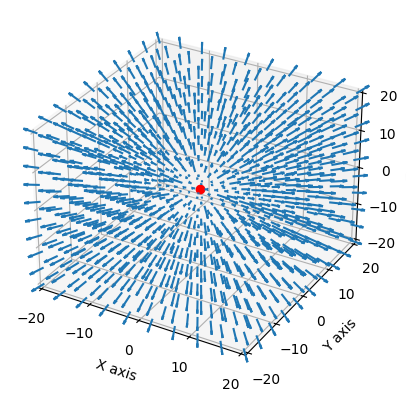

Eletric field at ([0.0, 0.0, 0.0]) is = -7.491667e+03, 0.000000e+00, 0.000000e+00 N/C            


In [48]:
"""
LB274 project: eletric field representaion and 
magnitude calculation 

By: Jack McNamara

thank you to dot phyiscs on youtube for a helpul tutrotial that allowed for me to get 
comfrarable with the quiver function in matplotlib.pyplot

link: https://www.youtube.com/watch?v=tKgZb71BUEQ
"""


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class ChargedParticle:
    def __init__(self, chrg: float, pos: list) -> None:
        self.charge = chrg
        if len(pos) != 3:
            raise ValueError("Position must have three components.")
        self.pos = pos  
    def __repr__(self) -> str:
        r = "Charge: {} C. Positon: x = {} m, y = {} m, z = {} m".format(self.charge,self.pos[0],self.pos[1],self.pos[2])
        return r

# Constants
K_c = 8.99e9


def find_E_vectorized(chrg_obj: ChargedParticle,obs_location: list) -> list: 
    """
    Find Eletric field vector at observation loaction where obs location are vectorized (ex: using np.linsapce)
    :param chrg_obj: ChargedParticle object of lovation of charge
    :Param obs_loacation: list of x,y,z corinates of observation location
    :return: list of vector componenets of eletric field at observation location
    """
    r = [obs_location[0] - chrg_obj.pos[0], obs_location[1] - chrg_obj.pos[1], obs_location[2] - chrg_obj.pos[2]]
    mag_r = (r[0]**2+r[1]**2+r[2]**2)**.5

    # Prevent division by zero by adding a small value to mag_r
    mag_r[mag_r == 0] = 1*(10**-20)

    r_hat = r / mag_r
    E = K_c * chrg_obj.charge / mag_r**2
    E_vector = []
    for i in range(len(r_hat)):
        E_vector.append(E*r_hat[i])
    return E_vector

def find_E_scalar(chrg_obj: ChargedParticle,obs_location: list) -> list: 
    """
    Find Eletric field vector at observation loaction where obs location are scalar (ex: list of floats)
    :param chrg_obj: ChargedParticle object of lovation of charge
    :Param obs_loacation: list of x,y,z corinates of observation location
    :return: list of vector componenets of eletric field at observation location
    """
    r = [obs_location[0] - chrg_obj.pos[0], obs_location[1] - chrg_obj.pos[1], obs_location[2] - chrg_obj.pos[2]]
    mag_r = (r[0]**2+r[1]**2+r[2]**2)**.5

    # Prevent division by zero by adding a small value to mag_r
    if mag_r == 0:
        mag_r = 1*(1**-20)
    
    r_hat = []
    for comp in r:
        r_hat.append(comp/mag_r)
    E = K_c * chrg_obj.charge / mag_r**2
    E_vector = []
    for i in range(len(r_hat)):
        E_vector.append(E*r_hat[i])
    return E_vector

def sum_fields (chrg_lst:list,x:float,y:float,z:float)->tuple:
    """
    find the eetric field at a point for multiple charges
    :param chrg_lst: list of ChargedParticle objects impacting eletric field
    :param x: float value of x cord
    :param y: float value of y cord
    :param z: float value of z cord
    """
    # Initialize vector component for x,y,z
    u, v, w = 0, 0, 0
    for particle in chrg_lst:
        if (type(x)!=float):
            E = find_E_vectorized(particle,[x,y,z])
        else:
            E = find_E_scalar(particle,[x,y,z])

        u += E [0]
        v += E [1]
        w += E [2]
    return u,v,w

def make_eletric_flied_plot(chrg_lst: list[ChargedParticle]) -> None:
    """
    makes a 3d eleteic feild plot and displays it
    :param chrg_lst: list of ChargedParticle objects to plot
    :return: None
    """

    # finding max and min values for each axis
    sorted_x = sorted(chrg_lst, key= lambda x: x.pos[0])
    sorted_y = sorted(chrg_lst, key= lambda y: y.pos[1])
    sorted_z = sorted(chrg_lst, key= lambda z: z.pos[2])

    min_x = sorted_x[0].pos[0]
    max_x = sorted_x[-1].pos[0]

    min_y = sorted_y[0].pos[1]
    max_y = sorted_y[-1].pos[1]

    min_z = sorted_z[0].pos[2]
    max_z = sorted_z[-1].pos[2]

    lowest_min = min(min_x,min_y,min_z)
    highest_max = max(max_x,max_y,max_z)
    # Grid for x, y, z points
    x, y, z = np.meshgrid(np.linspace(lowest_min - 20, highest_max + 20, 10),
                        np.linspace(lowest_min - 20, highest_max + 20, 10),
                        np.linspace(lowest_min - 20, highest_max + 20, 10))

    u,v,w = sum_fields(chrg_lst,x,y,z)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    #find a good length proportional to the scale of the graph for the field arrows
    good_length = abs((lowest_min - 20) - (highest_max + 20))/14

    ax.quiver(x, y, z, u, v, w, length=good_length, normalize=True)

    ax.set_xlim([lowest_min - 20, highest_max + 20])
    ax.set_ylim([lowest_min - 20, highest_max + 20])
    ax.set_zlim([lowest_min - 20, highest_max + 20])
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    for i,c in enumerate(chrg_lst):
        ax.plot(c.pos[0],c.pos[1],c.pos[2], 'ro')

    plt.show()


def main():
    
    # User input for particle information
    charg_str = input("enter charges in the following format:\n charge , x cordinate , y cordiante, z corinate \n make sure to seperate each particle with a ';'")

    striped_charg_str = charg_str.replace(' ','')
    particle_list = striped_charg_str.split(';')
    charges= []
    for particle in particle_list: 
        particle = particle.split(',')
        if len(particle) != 4:
            raise ValueError ("""Please make sure each particle has 4 comma seprated values.\n
    Use the format: charge, x, y, z and sperate particles with ;\n
    example: 3.0, 2, 3.7, 18; 15, 77, 33, 68.8""")
        for i in range(len(particle)):
            particle[i] = float(particle[i])
        pos = particle [1:]
        charges.append(ChargedParticle(particle[0], pos))
    make_eletric_flied_plot(chrg_lst=charges)
    find_E_at_point = input ("would you like to see the vector components of eletric field\
                             at a specified loaction for the system of charges you input?\
                             (type Y/N): ")
    if find_E_at_point.lower() == "y":
        obs_loci = input("what postion would you like to know the eletric field of (x,y,z format)")
        obs_loci = obs_loci.split(',')
        if len(obs_loci) != 3:
            raise ValueError("location must only have 3 cordinates (x,y,z)")
        for i in range(len(obs_loci)):
            cord = obs_loci[i].strip()
            obs_loci[i] = float(cord)
        field = sum_fields(charges,obs_loci[0],obs_loci[1],obs_loci[2])
        print("Eletric field at ({}) is = {:e}, {:e}, {:e} N/C\
            ".format(obs_loci,field[0],field[1],field[2]))
main()


